# Example of Algorithm based on Logistic Regression and its implementation in Python
Now that the basic concepts about Logistic Regression are clear, it is time to study a real-life application of Logistic Regression and implement it in Python.

Let’s work on classifying credit card transactions as fraudulent, also called credit card fraud detection. It is a very important application of Logistic Regression being used in the business sector. A real-world dataset will be used for this problem. It is quite a comprehensive dataset having information of over 280,000 transactions. Step by step instructions will be provided for implementing the solution using logistic regression in Python.

In [3]:
#Doing import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Preprocessing the Dataset
Preprocessing the dataset is a very important part of the analysis, it is used to remove outliers and duplicates from the dataset. Moreover, it is a very common practice to scale the columns on a standard scale, it helps in faster convergence and gives better results.

In [7]:
sum(df.duplicated())

1081

In [8]:
df.drop_duplicates(inplace = True)

In addition to rows, sometimes there are columns in the data which do not give any meaningful information for the classification, therefore they should be removed from the data before training the model. One such column in our dataset is the Time column. It can be removed using the line of code given below:

In [9]:
df.drop('Time', axis = 1, inplace = True)

After the data has been cleaned, the dataset columns can be separated into feature columns and target column. As mentioned before, the class column is the target column and everything else is a feature. Thus, doing that below:

In [12]:
x = df.iloc[:, df.columns != 'Class']
y = df.Class

Having done that, the dataset can be divided into training and test sets. The training set is used to train the classifier, while the test set can be used to evaluate the performance of the classifier on unseen instances.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=5, stratify = y)

In [15]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

# Exploratory Data Visualization
It often makes things much easier to understand when visualizations and graphics are used. The same goes for Machine Learning problems. Different aspects of the dataset are visualized to get a better understanding of the data, and this process is called exploratory data visualization.

Plotting histograms to understand the values of each variable is a good place to start. Using the code given below:

<ipython-input-16-f380dad5d199>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataframe[features].hist(bins = 20, ax = ax, facecolor = colors[i])


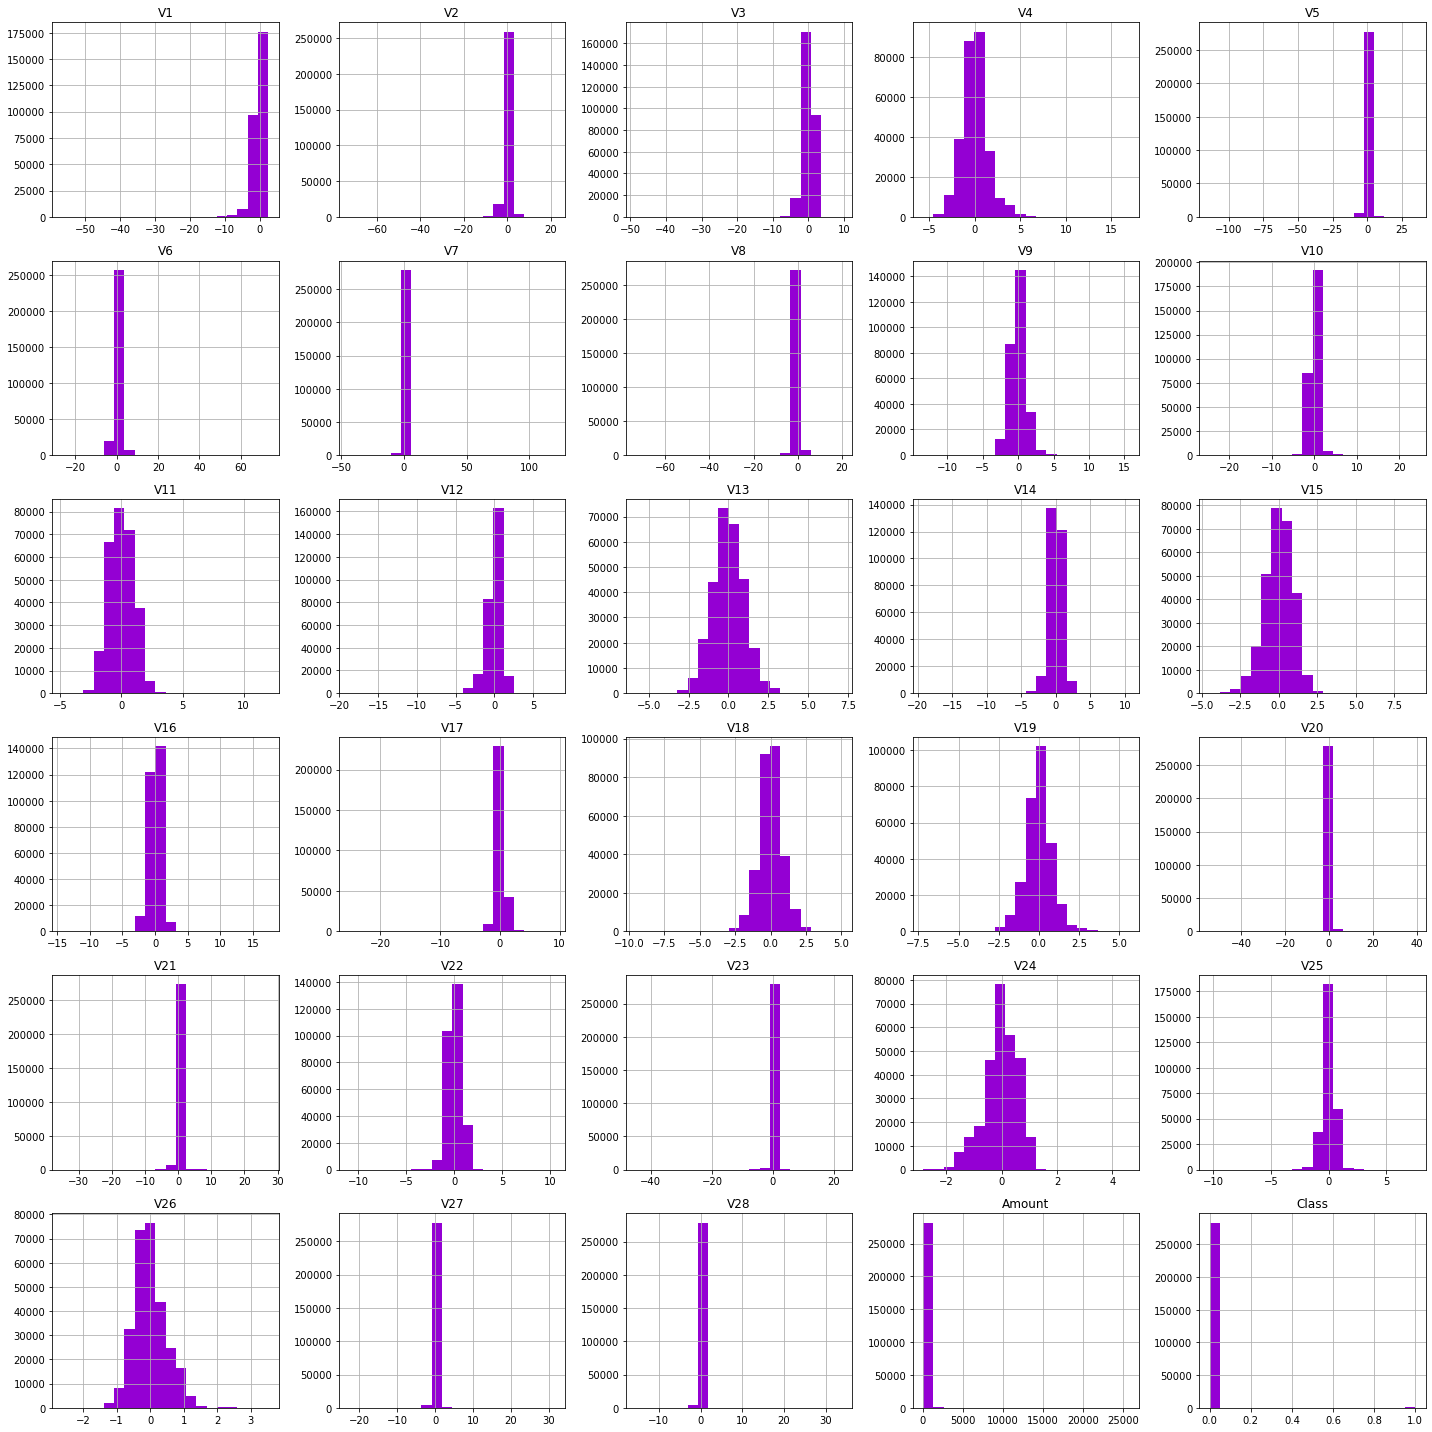

In [16]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[features].hist(bins = 20, ax = ax, facecolor = colors[i])
        ax.set_title(feature + "Histogram", color = colors[35])
        ax.set_yscale('log')
    fig.tight_layout()
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df, df.columns, 8, 4)
        

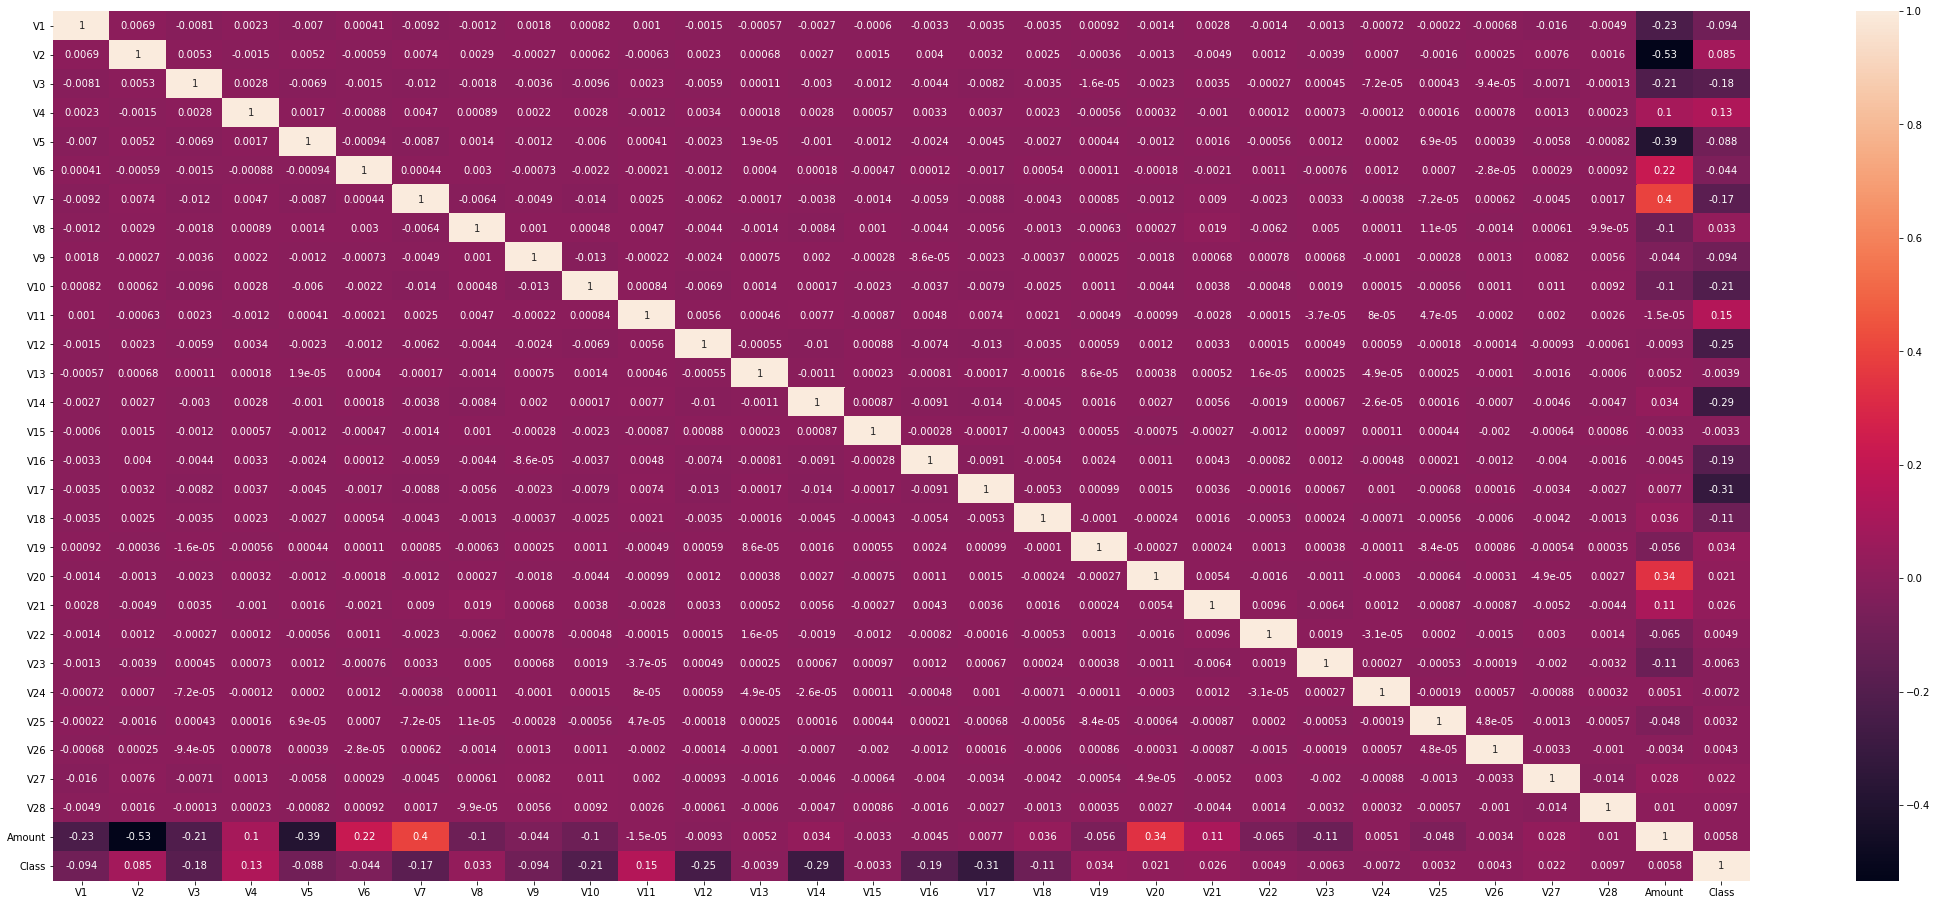

In [17]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot= True)
plt.savefig('heatmap.png')
plt.show()

In [18]:
#Building Logistic Regression model
model = LogisticRegression()

# Training the model
The model can be trained by passing train set features and their corresponding target class values. The model will use that to learn to classify unseen examples.

In [19]:
model.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
#Evaluating on Training set
train_acc = model.score(x_train_scaled, y_train)
print("The accuracy for Training set is {}".format(train_acc*100))

The accuracy for Training set is 99.32857520486387


In [22]:
y_pred = model.predict(x_test)

In [23]:
#Evaluating on test set
test_acc = accuracy_score(y_test, y_pred)
print("The accuracy for the test set is {}".format(test_acc*100))

The accuracy for the test set is 99.9066013463504


In [25]:
#Generating classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.80      0.59      0.68        95

    accuracy                           1.00     56746
   macro avg       0.90      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746



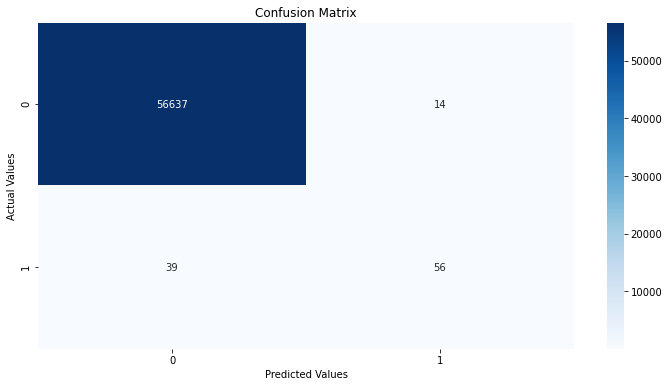

In [27]:
#Visualizing using confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('confusion_matrix.png')

A real-life example of Logistic Regression was studied. The analysis involved over 280,000 instances of transactions which were further divided into training and test sets by a ratio of 80 to 20 respectively. After exploring and preprocessing the dataset, the model was trained and a classification accuracy of 99.9% was obtained. It showed that Logistic Regression was very successful in detecting fraudulent transactions, although more improvement can also be made by tuning the model (advance concepts).